In [2]:
from utils.plotting import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [3]:
databse_name = "fehring_growing_nn"
table_name = "incumbent_gen_2_layers"

In [4]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-09-03 16:36:32,488  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-09-03 16:36:32,489  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-09-03 16:36:32,489  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-09-03 16:36:32,489  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-09-03 16:36:32,489  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-09-03 16:36:32,489  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-09-03 16:36:32,490  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-09-03 16:36:32,490  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-09-03 16:36:32,490  | py-experimenter - WARNING  | No values given for keyfield seed
2024-09-03 16:36:32,490  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

DatabaseError: Execution failed on sql 'SELECT * FROM incumbent_gen_2_layers__smac_callbacks': (1146, "Table 'fehring_growing_nn.incumbent_gen_2_layers__smac_callbacks' doesn't exist")

In [ ]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 2]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [ ]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:07:44,947  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:07:44,947  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:44,947  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:44,948  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:44,948  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:44,948  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:44,948  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:44,948  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:44,948  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:44,949  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:07:45,019  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:07:45,167  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:07:45,257  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:07:45,259  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:07:45,261  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:07:45,262  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:07:45,263  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:07:45,264  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [ ]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
4800,9101,2,2024-07-18 01:07:32,2,48,None,50000,-1.552,0.776541
4801,9102,2,2024-07-18 01:07:32,2,48,None,100000,-0.956,0.956684
4802,9103,2,2024-07-18 01:07:32,2,48,None,150000,-0.279,0.861724
4803,9104,2,2024-07-18 01:07:32,2,48,None,200000,-1.167,0.953332
4804,9105,2,2024-07-18 01:07:32,2,48,None,250000,-0.880,1.116620
...,...,...,...,...,...,...,...,...,...
4895,9196,2,2024-07-18 01:13:11,1,48,None,800000,1.000,0.000000
4896,9197,2,2024-07-18 01:13:12,1,48,None,850000,1.000,0.000000
4897,9198,2,2024-07-18 01:13:12,1,48,None,900000,1.000,0.000000
4898,9199,2,2024-07-18 01:13:12,1,48,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

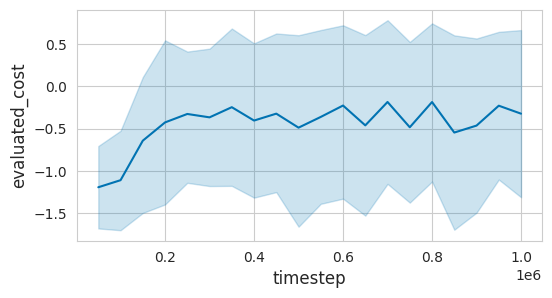

In [ ]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

In [ ]:
last_timestep = relevat_training_process_before_growth[relevat_training_process_before_growth["timestep"] == relevat_training_process_before_growth["timestep"].max()]
last_timestep["mean_cost"] = last_timestep["evaluated_cost"]
last_timestep

2024-08-22 14:07:45,776  | py.warnings - WARNING  | /tmp/ipykernel_366229/818150378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_timestep["mean_cost"] = last_timestep["evaluated_cost"]

2024-08-22 14:07:45,776  | py.warnings - WARNING  | /tmp/ipykernel_366229/818150378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_timestep["mean_cost"] = last_timestep["evaluated_cost"]

2024-08-22 14:07:45,776  | py.warnings - WARNING  | /tmp/ipykernel_366229/818150378.py:2: SettingWithCopyWarning: 
A

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev,mean_cost
4819,9120,2,2024-07-18 01:07:34,2,48,None,1000000,-0.683,1.080070,-0.683
4839,9140,2,2024-07-18 01:07:37,4,48,None,1000000,-1.951,0.018682,-1.951
4859,9160,2,2024-07-18 01:08:06,0,48,None,1000000,-0.983,0.983728,-0.983
4879,9180,2,2024-07-18 01:12:00,3,48,None,1000000,1.000,0.000000,1.000
4899,9200,2,2024-07-18 01:13:12,1,48,None,1000000,1.000,0.000000,1.000


# Add Grow Once Data

## 0.1 Noise

In [ ]:
table_name = "net2deeper_grow_width_once"

In [ ]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 1]


2024-08-22 14:07:45,804  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:07:45,804  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:45,805  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:07:45,878  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:07:46,033  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:07:46,119  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:07:46,120  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:07:46,122  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:07:46,124  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:07:46,125  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:07:46,126  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [ ]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [ ]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:07:46,431  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:07:46,432  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:46,432  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:46,432  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:46,433  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:46,433  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:46,433  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:46,434  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:46,434  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:46,435  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:07:46,506  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:07:46,655  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:07:46,747  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:07:46,748  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:07:46,750  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:07:46,752  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:07:46,753  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:07:46,754  | py-experimenter - WARNING  | Tunnels are not started. Please .s

2024-08-22 14:07:47,103  | py.warnings - WARNING  | /tmp/ipykernel_366229/1680061873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] = relevat_training_process_after_growth["timestep"] + relevat_training_process_before_growth["timestep"].max()

2024-08-22 14:07:47,103  | py.warnings - WARNING  | /tmp/ipykernel_366229/1680061873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] = relevat_training_process

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

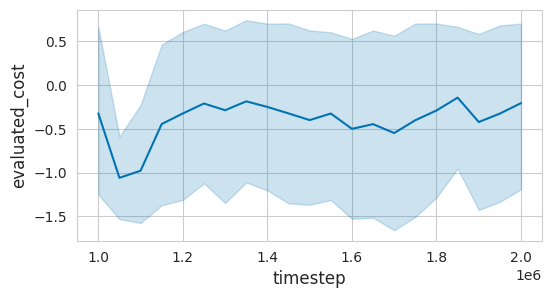

In [ ]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_after_growth["timestep"] = relevat_training_process_after_growth["timestep"] + relevat_training_process_before_growth["timestep"].max()
relevat_training_process_after_growth = pd.concat([last_timestep, relevat_training_process_after_growth])
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

## 0.2 Noise

In [ ]:
table_name_2 = "net2deeper_grow_width_once_new"

In [ ]:
grow_once_cost_2 = get_logtable(databse_name, table_name_2, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
grow_once_cost_2 = grow_once_cost_2[grow_once_cost_2["experiment_id"] == 2]

2024-08-22 14:07:47,342  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:07:47,343  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:47,343  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:47,343  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:47,344  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:47,344  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:47,344  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:47,344  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:47,345  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:47,345  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:07:47,417  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:07:47,565  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:07:47,654  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:07:47,655  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:07:47,657  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:07:47,658  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:07:47,659  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:07:47,659  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [ ]:
grow_once_cost_2

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,50,2,2024-07-24 10:44:57,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.6454
1,51,2,2024-07-24 10:53:07,2,None,"{'batch_size': 256, 'ent_coef': 0.107882379647...",1.7328
2,52,2,2024-07-24 11:04:27,3,None,"{'batch_size': 128, 'ent_coef': 0.229283551219...",0.7846
3,53,2,2024-07-24 11:40:56,4,None,"{'batch_size': 32, 'ent_coef': 0.0017112052068...",0.3292
4,54,2,2024-07-24 12:17:04,5,None,"{'batch_size': 32, 'ent_coef': 0.2912519236095...",1.9646
5,55,2,2024-07-24 12:29:54,6,None,"{'batch_size': 128, 'ent_coef': 0.068384815938...",0.8640
6,56,2,2024-07-24 12:39:28,7,None,"{'batch_size': 256, 'ent_coef': 0.194468993693...",1.5024
7,57,2,2024-07-24 13:04:02,8,None,"{'batch_size': 64, 'ent_coef': 0.1208517263643...",1.1442
8,58,2,2024-07-24 13:15:50,9,None,"{'batch_size': 64, 'ent_coef': 0.2583484316244...",1.4330
9,59,2,2024-07-24 13:29:36,10,None,"{'batch_size': 256, 'ent_coef': 0.035920777637...",0.7634


In [ ]:
# select row with minimal cost
grow_once_minimal_cost_row_2 = grow_once_cost_2.loc[grow_once_cost_2["cost"].idxmin()]
minimal_cost_experiment_id_2 = grow_once_minimal_cost_row_2["experiment_id"]
minimal_cost_trial_2 = grow_once_minimal_cost_row_2["trial_number"] -1 
minimal_cost_2  = grow_once_minimal_cost_row_2["cost"]

In [ ]:
training_process_after_growth_2 = get_logtable(databse_name, table_name_2, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:07:47,936  | py-experimenter - WARNING  | No values given for keyfield environment_name


2024-08-22 14:07:47,936  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:47,936  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:47,936  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:47,937  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:47,937  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:47,937  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:47,937  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:47,937  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:47,937  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-08-22 14:07:47,938  | py-experimenter - WARNING  | No values given for keyfield n_evaluatio

2024-08-22 14:07:55,407  | py.warnings - WARNING  | /tmp/ipykernel_366229/1241771169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 14:07:55,407  | py.warnings - WARNING  | /tmp/ipykernel_366229/1241771169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 1

<Axes: xlabel='timestep', ylabel='mean_cost'>

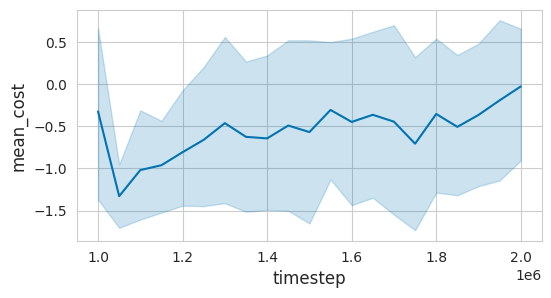

In [ ]:
relevat_training_process_after_growth_2 = training_process_after_growth_2[(training_process_after_growth_2["experiment_id"] == minimal_cost_experiment_id_2) & (training_process_after_growth_2["trial_number"] == minimal_cost_trial_2)]
relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()
relevat_training_process_after_growth_2 = pd.concat([last_timestep, relevat_training_process_after_growth_2])
sns.lineplot(data=relevat_training_process_after_growth_2, x="timestep", y="mean_cost")

# Optimized Noise

In [ ]:
table_name_3 = "net2deeper_grow_width_once_new"

In [ ]:
optimized_noise_samc_callback = get_logtable(databse_name, table_name_3, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
optimized_noise_samc_callback = optimized_noise_samc_callback[optimized_noise_samc_callback["experiment_id"] == 5]

2024-08-22 14:07:55,631  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:07:55,632  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:55,632  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:55,632  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:55,633  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:55,633  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:55,633  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:55,633  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:55,634  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:55,634  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:07:55,704  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:07:55,853  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:07:55,942  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:07:55,943  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:07:55,944  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:07:55,946  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:07:55,947  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:07:55,948  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [ ]:
optimized_noise_row = optimized_noise_samc_callback.loc[optimized_noise_samc_callback["cost"].idxmin()]
minimal_cost_experiment_id_3 = optimized_noise_row["experiment_id"]
minimal_cost_trial_3 = optimized_noise_row["trial_number"] -1

In [ ]:
optimize_noise_training_process = get_logtable(databse_name, table_name_3, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
relevat_training_process_after_growth_3 = optimize_noise_training_process[(optimize_noise_training_process["experiment_id"] == minimal_cost_experiment_id_3) & (optimize_noise_training_process["trial_number"] == minimal_cost_trial_3)]

2024-08-22 14:07:56,258  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:07:56,259  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:07:56,259  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:07:56,260  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:07:56,331  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:07:56,479  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:07:56,567  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:07:56,568  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:07:56,570  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:07:56,571  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:07:56,572  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:07:56,573  | py-experimenter - WARNING  | Tunnels are not started. Please .s

2024-08-22 14:08:03,389  | py.warnings - WARNING  | /tmp/ipykernel_366229/1573284263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_after_growth_3["timestep"] += training_process_after_growth_3["timestep"].max()

2024-08-22 14:08:03,389  | py.warnings - WARNING  | /tmp/ipykernel_366229/1573284263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_after_growth_3["timestep"] += training_process_after_growth_3["timestep"].max()

2024-08-22 14:08:03,389  | py.warnings - W

<Axes: xlabel='timestep', ylabel='mean_cost'>

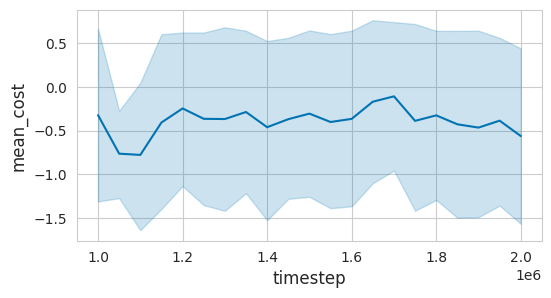

In [ ]:
training_process_after_growth_3 = optimize_noise_training_process[(optimize_noise_training_process["experiment_id"] == minimal_cost_experiment_id_3) & (optimize_noise_training_process["trial_number"] == minimal_cost_trial_3)]
training_process_after_growth_3["timestep"] += training_process_after_growth_3["timestep"].max()
training_process_after_growth_3 = pd.concat([last_timestep, training_process_after_growth_3])
sns.lineplot(data=training_process_after_growth_3, x="timestep", y="mean_cost")

# Add Baseline

In [ ]:
table_name_baseline = "hpo_warmstart_2_layers"

In [ ]:
warmstarting_table = get_logtable(databse_name, table_name_baseline, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 2]

2024-08-22 14:08:03,610  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:08:03,611  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:08:03,611  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:08:03,611  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:08:03,612  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:08:03,612  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:08:03,612  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:08:03,612  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:08:03,613  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:08:03,613  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:08:03,685  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:08:03,835  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:08:03,924  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:08:03,925  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:08:03,926  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:08:03,927  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:08:03,928  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:08:03,929  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [ ]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [ ]:
samc_cost_warmstarting_row

ID                                                                              40
experiment_id                                                                    2
timestamp                                                      2024-07-19 04:27:16
trial_number                                                                    40
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 128, 'ent_coef': 0.007439229072...
cost                                                                       -0.0664
Name: 39, dtype: object

In [ ]:
training_process_after_warmstarting = get_logtable(databse_name, table_name_baseline, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:08:04,246  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:08:04,247  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:08:04,247  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:08:04,247  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:08:04,247  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:08:04,248  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:08:04,248  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:08:04,248  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:08:04,248  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:08:04,248  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [ ]:
training_process_after_warmstarting= training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 2) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

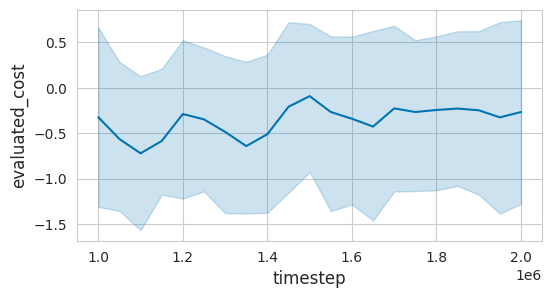

In [ ]:
# Plot training process after warmstarting
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
training_process_after_warmstarting = pd.concat([last_timestep, training_process_after_warmstarting])
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Figure size 600x300 with 0 Axes>

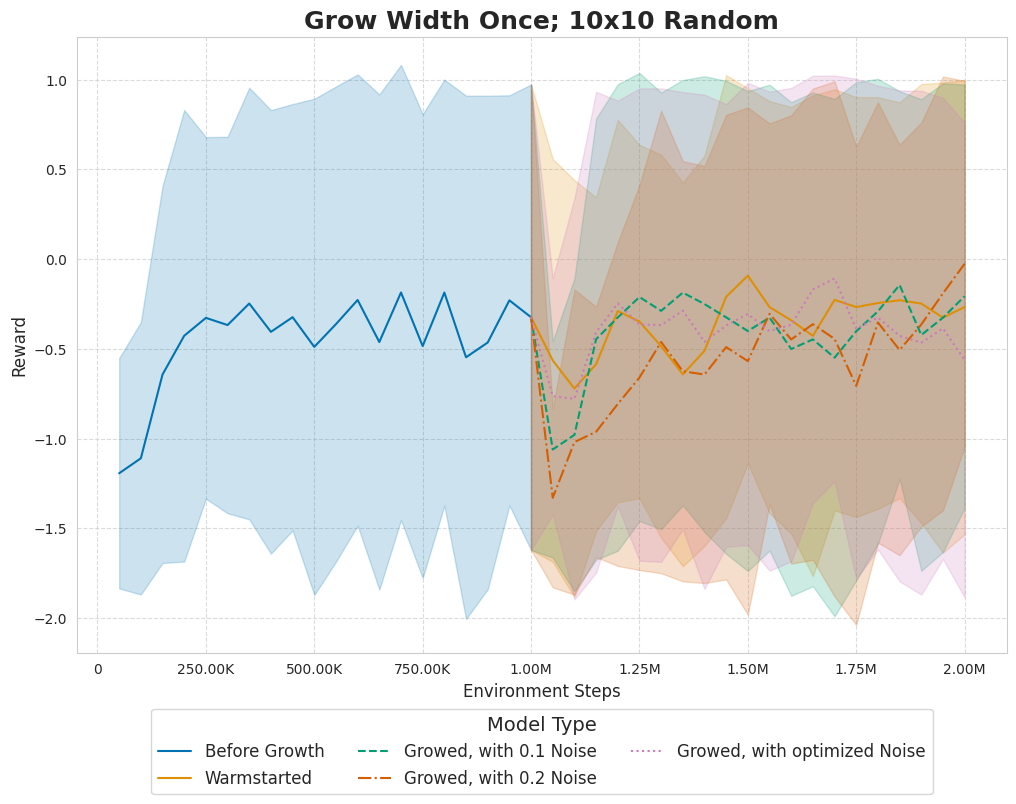

In [ ]:
import seaborn as sns
from utils.plotting import training_process_style
training_process_style()
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost", label="Before Growth",)
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost", label="Warmstarted")
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost", label="Growed, with 0.1 Noise", linestyle="--",)
sns.lineplot(data=relevat_training_process_after_growth_2, x="timestep", y="mean_cost", label="Growed, with 0.2 Noise", linestyle="-.",)
sns.lineplot(data=training_process_after_growth_3, x="timestep", y="mean_cost", label="Growed, with optimized Noise", linestyle=":")

plt.xlabel("Environment Steps")
plt.ylabel("Reward")
plt.legend(title="Model Type", fontsize=12, title_fontsize=14, loc="center", bbox_to_anchor=(0.5, -0.16), ncol=3)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Grow Width Once; 10x10 Random", fontsize=18, fontweight="bold")
plt.savefig("plotting/minihack/grow_width_once/grow_width_once_10x10_random.png", dpi=300, bbox_inches="tight")